# Graph coloring using CSP

---
#### Course: Aritificial Intelligence
#### Professor: Dr. Mehdi Ghatee
#### TA: Rouhollah Ahmadian
#### Student: Ilya Khalafi
#### Student ID: 9913039
#### November 2022 

# Table Of Contents
- [Introduction](#intro)
- [Approach](#approach)
- [Dependencies](#dependency)
- [Abstract Classes](#abstract-classes)
    - [Problem Class](#problem)
        - [Structure](#problem-structure)
        - [Implementation](#problem-implementation)
    - [Variable Class](#variable)
        - [Structure](#variable-structure)
        - [Implementation](#variable-implementation)
- [Graph Class](#graph)
    - [Properties](#graph-properties)
    - [Methods](#graph-methods)
    - [Implementation](#graph-implementation)
- [Node Class](#node)
    - [Properties](#node-properties)
    - [Methods](#node-methods)
    - [Implementation](#node-implementation)
- [MinConflictSolver Class](#minconflictsolver)
    - [Properties](#solver-properties)
    - [Methods](#solver-methods)
    - [Implementation](#solver-implementation)
- [Launching the Code!](#code-launch)

<a name="intro"></a>

# Introduction 📚

---

In graph theory, graph coloring is a classic problem which tries to label elements of a graph with respect to some constraints. Simplest and most popular form of graph coloring is **Vertex coloring** which is a way of coloring vertices that no adjacent vertex have same color.

There are many algorithms to solve graph vertex coloring problem, including search algorithm that we learned in the class but in this notebook we try to solve this problem as a **Constraint Satisfaction Problem (CSP)** and solve it using **Min Conflict Algorithm**.



<a name="approach"></a>

# Approach 🧭

---
We try to define our problem with standard structure of a CSP so we define 2 abstract classes, **Problem Class** and **Variable Class**. The we need to define **Graph Class** and **Node Class** and these 2 classes will keep structure of our graph. 

The key point of this notebook's approach is that **Graph Class** will inherit the **Problem Class** and **Node Class** will inherit the **Variable Class**. This structure is logical because Variables to CSP Problem are like Nodes to Graph and constraints of the CSP are like edges of this graph. Also this structure simplifies our code because we don't need to make a new Problem class from a Graph class and also constraints can be checked easily inside Node class by checking neighbors.

So These will be the final classes:

- **Problem** : <br />
This class is an abstract class that represents a CSP Problem and we will pass its instance to an instance of MinConflictSolver to solve. This class will have 2 abstract methods that randomly assign value to variables and another one returns a conflicted variable of the problem, every child class of this class should implement these methods.

- **Variable** : <br />
This is an abstract class that represents a Variable of CSP. It has a property named value which in this case will be color of a node and it has 1 abstract method that counts amount of conflicts that current variable with current value has with other variables.

- **Graph** : <br />
This class inherits and implements methods of **Problem Class** and also keep structures of our graph including nodes that are instances of **Node Class**.

- **Node** : <br />
This class inherits and implements methods of **Variable Class** and also defines each node of the graph. We will keep constraint related methods in this class.

- **MinConflictSolver** : <br />
This class takes and keeps an instance of Problem class as its property and will have a key method named **step** which will make 1 step of min conflict algorithm on its target problem. Making solver to work step by step helps us to inspect algorithm's procedure for educational purpose. 

<a name="dependency"></a>

# Dependencies

---

- **Networkx and Matplotlib** : <br />
    We need these 2 libraries to plot and visualize our graph.

- **abc**: <br />
    This library is an standard library of python and it's used for making abstract methods and classes.

- **numpy.random.choice** : <br />
    We will use this method to pick random elements of a list.

In [ ]:
# We need these 2 libraries to illustrate the graph
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# We need abc library to define abstract classes and methods 
from abc import ABC, abstractmethod
# We need choice method for random pick of variables
from numpy.random import choice

<a name="abstract-classes"></a>

#Abstract Classes 🔤

---

We will define **Problem** and **Variable** classes as abstract classes to build base of our project classes. We will use **abc** library properties to define abstract classes.



<a name="problem"></a>

### Problem Class ❓

---

This is an abstract class and it won't be possible to make instances of this class directly but children of this class will implement asbtract methods of this class and each children will represent a special CSP problem.


<a name="problem-structure"></a>

#### Structure 

This class contains only 1 property:

- **variables** : <br />
    This is a list of instances of Variable class and keeps variables of CSP.

This class also contains 2 methods:

- **variables** : <br />
    This is a list of instances of Variable class and keeps variables of CSP.

- **shuffle_assignment** : <br />
    Assigns random value to each variable of the variables list from variable's domain

- **get_conflict** : <br />
    Returns a variable from variables list if it has at least 1 conflict, also returns None if no variable has any conflict which means that the problem is solved.




<a name="problem-implementation"></a>

#### Implementation

In [ ]:
class Problem():
	
	def __init__(self, variables:list = []):
		self.variables = variables
 
	@abstractmethod
	def shuffle_assignment(self):
		'''
		Assigns random values to variables
		from their domains
		'''
		pass

	@abstractmethod
	def get_conflict(self):
		'''
		returns a random conflicted variable 
		returns None if there is no conflicted variable
		'''
		pass

<a name="variable"></a>

### Variable Class 📊

---

This is also an abstract class and its instances represent variables of a children of Problem class.


<a name="variable-structure"></a>

#### Structure 

This class contains 2 properties:

- **domain** : <br />
    This is a list of objects that can be assigned to the value of current variable. objects of this list can be of any type but in this problem we will pass string of colors' names as variables' domain.

- **value** : <br />
    This is the value of current variable in the problem assignment. At first we set it to None and problem instance sets random value when its shuffle_assignment method is called. Also instance of solver class will modify this value to find a solution for the problem.

This class ony contains 1 method:

- **count_conflicts** : <br />
    Returns amount of conflicts that current value of variable has with related constraints of the variable.




<a name="variable-implementation"></a>

#### Implementation

In [ ]:
class Variable(ABC):
    
	def __init__(self, domain:list = []):
		self.domain = domain
		self.value = None
        
	def count_conflicts(self):
		'''
		returns amount of constraints that have 
		conflict this variable's value
		'''
		pass
    

<a name="graph"></a>

# Graph Class 🌐

---
This class is a children of Problem Class and implements its methods for graph coloring problem as a CSP. This class keeps instances of Node class which are nodes of the graph and variables of CSP.



<a name="graph-properties"></a>

#### Properties :

 - **nodes** : <br />
    This is a list including instances of Node class that are nodes of the graph

 - **variables** : <br />
    This property is inherited from Problem Class and we will set it equal to nodes property. Notice that Node Class inherits from Variable Class and every node has functionality of a variable of CSP. 

<a name="graph-methods"></a>

#### Methods :

- **\_\_init__** : <br />
    This is constructor method of the class and assigns passed values to the class properties.

- **random** : <br />
    This method makes a random graph with given amount of nodes and adds each edge to the graph with a given probability.

- **shuffle_assignment** : <br />
    This method is inherited from Problem Class and assigns random values to each variable of the problem from its domain, in this case it assigns colors to each node from that node's domain.

- **add_edge** : <br />
    This method takes indices of two nodes from nodes property and adds an edge between these two nodes.

- **get_conflict** : <br />
    This method is inherited from Problem Class and returns a random conflicted variable(node), returns None if there is no conflicted variable

- **visualize** : <br />
    This method draw the plot of the graph using networkx and matplotlib libraries.

<a name="graph-implementation"></a>

#### Implementation : 
First we define the class and its constructor method *\_\_init__*.
This will be base of our class and we implement and add other methods on top of it.


In [ ]:
class Graph(Problem):
    
	def __init__(self, nodes:list = []):
		self.nodes = nodes
		super().__init__(variables=self.nodes)

Then we define **"random"** method which takes 3 arguments **num_nodes**, **prob** and **domain**. It makes a graph with num_nodes amount of nodes and adds each edge of the graph with probability of prob. Also sets domain of each node equal to domain argument.

In [ ]:
def random(num_nodes:int, prob:float = 0.5, domain:list = []):
    '''
    This method returns an instance of graph class
    with random structure, arguments are:
        nums_nodes = amount of the nodes in the graph
        prob = probility for each edge to be present in the graph,
                this arg will be used to control density of edges.
                This arg should be in range [0, 1]
        domain = domain of each node of the graph will be set to this arg
    '''
    g = Graph(nodes = [Node(domain=domain) for _ in range(num_nodes)])
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if choice([0, 1], p=[1-prob, prob]):
                g.add_edge(i, j)
    return g

# Adding "random" function to the Graph class
Graph.random = random

Next method is **shuffle_assignment**. This method uses choice method that we imported from numpy.random in order to assign random values to each variable(node) of the problem(graph).

In [ ]:
def shuffle_assignment(self):
    '''
    Assigns random values to variables
    from their domains
    '''
    for var in self.variables:
        var.value = choice(var.domain)

# Adding "shuffle_assingment" function to the Graph class
Graph.shuffle_assignment = shuffle_assignment

Next method is **add_edge** which takes indices of two nodes in the nodes list of the graph instance and adds an edge between these nodes. This method uses **add_neighbor** method of the Node Class and **add_neighbor** method adds a new node to the list of nieghbors of the node and neighbors of the node will be kept in a set, so adding an edge multiple times will not make more than 1 edge between the nodes.

In [ ]:
def add_edge(self, node1_index:int, node2_index:int):
    '''
    This method takes index of two nodes in its internal
    nodes list and add an edge between  
    Adding edge between 2 nodes of graph
    '''
    self.nodes[node1_index].add_neighbor(self.nodes[node2_index])
    self.nodes[node2_index].add_neighbor(self.nodes[node1_index])

# Adding "add_edge" function to the Graph class
Graph.add_edge = add_edge

Now we implement **get_conflict** method which is inherited from Problem Class. Here we use count_conflicts method of the Node Class. If a node has any conflict, then count_conflicts method will return a non zero integer and we add this node to conflicted nodes of the graph.

Then we use **choice** method that we imported from numpy.random to return one of the conflicted nodes randomly. Also if no conflicted node was found and conflicted nodes list was empty, we return None which means that the problem is solved!

In [ ]:
def get_conflict(self):
    '''
    returns a random conflicted variable 
    returns None if there is no conflicted variable
    '''
    conflicted = []
    for node in self.nodes:
        if node.count_conflicts() != 0:
            conflicted.append(node)

    # Pick and return a random conflcited variable using choice method
    # Notice that empty lists are considered as False in python
    return choice(conflicted) if conflicted else None

# Adding "get_conflict" function to the Graph class
Graph.get_conflict = get_conflict

Next method is **visualize** which draws plot of the graph with colors assigned to each node using networkx and matplotlib library.

Notice that each nodes color will equal to node.value and if node's value was None, method plots it with black color.

In [ ]:
def visualize(self):
    '''
    Drawing picture of graph using networkx library.
    To use networkx, we make an instance of networkx Graph class
    and add nodes of our graph to this instance, the we add edges
    of each node to this instance
    '''
    G = nx.Graph()
    for node in self.nodes:
        G.add_node(node)
        for neighbor in node.neighbors:
            G.add_edge(node, neighbor)
    nx.draw(G, 
            node_color=[node.value if node.value != None else 'black' for node in list(G.nodes)],
            labels={node:node.id for node in list(G.nodes)}
            )
    plt.show()

# Adding "visualize" function to the Graph class
Graph.visualize = visualize

<a name="node"></a>

# Node Class ⚛

---
This class is a children of Variable Class and implements its methods for nodes of graph coloring problem as variables of CSP. This class keeps instances of Node Class which are its neighbors and reports amount of conflicts it has with its neighbor nodes with respect to its value.



<a name="node-properties"></a>

#### Properties :

 - **domain** : <br />
    This property is inherited from Variable Class and represent values that can be assign to this variable(node) for the CSP.

 - **neighbors** : <br />
    This is set that keeps instanes of Node Class and represents nodes that are adjacent to the current node.

 - **id** : <br />
    This is an integer assigned to the node. We will use it to draw graph's plot using networkx and provides better representation of our nodes in the graph's plot.

<a name="node-methods"></a>

#### Methods :

- **\_\_init__** : <br />
    This is constructor method of the class and assigns passed values to the class properties.

- **add_neighbor** : <br />
    This method adds a new node to current node's neighbors.

- **count_conflicts** : <br />
    Counts and returns amount of conflicts that current node has with its neighbors with respect to its current value. 

<a name="node-implementation"></a>

#### Implementation : 
First we define the class and its constructor method *\_\_init__*.
This will be base of our class and we implement and add other methods on top of it.


In [ ]:
class Node(Variable):

	last_id = 0

	def __init__(self, domain:list = [], neighbors:list = []):
		super().__init__(domain=domain)
		self.neighbors = set(neighbors)
		# node id is a number that we will use to help the
		# networkx differentiate graph's nodes in the graph's plot
		Node.last_id += 1
		self.id = Node.last_id

Next methods is **"add_neighbor"** which takes a node as argument and add this node to the current node's neighbor. Since neighbors are kept in a set, adding same node multiple times will not add it more than once to the neighbors' set. 

In [ ]:
def add_neighbor(self, neighbor):
    '''
    This method adds a new neighbor to the self node
    '''
    self.neighbors.add(neighbor)

# Adding "add_neighbor" function to the Node class
Node.add_neighbor = add_neighbor

Now we implement **"count_conflicts"** method that is inherited from Variable Class. This methods was defined abstract to count amount of conflict that current variable has with other variables with respect to its value property. Here we implement it to count amount of its neighbors that have equal value(color) with current node.

In [ ]:
def count_conflicts(self):
    '''
    This is an abstract method from Variable class that
    ia defined to return amount of constraints that have 
    conflict this variable's value.
    Here, it returns amount of neighbor nodes that
    have conflict with self node
    '''
    conflicts = 0
    for neighbor in self.neighbors:
        if neighbor.value == self.value:
            conflicts += 1
    return conflicts if self.value else -1

# Adding "count_conflicts" function to the Node class
Node.count_conflicts = count_conflicts

<a name="minconflictsolver"></a>

# MinConflictSolver Class 🧠

---
This class includes implementation of **"Min Conflict Algorithm"** Solver for CSPs from Russel-Norvig's AI Book. Also this class takes every step of this algorithm when its **"step"** method is called, so we can inspect its procedure and progress during the continous call to the "step" method to solve the target CSP.


<a name="solver-properties"></a>

#### Properties :

 - **problem** : <br />
    This is an instance of children of Problem Class which in this class is Graph class. this solver will call the problem to get random conflicted variable from the problem.

<a name="solver-methods"></a>

#### Methods :

- **\_\_init__** : <br />
    This is constructor method of the class and assigns passed values to the class properties.

- **step** : <br />
    This class takes one step of the min conflict algorithm on its target problem. If it finds the solution in this step and problem is solved, returns True and otherwise return False after taking the step of algorithm.

<a name="solver-implementation"></a>

#### Implementation : 
First we define the class and its constructor method *\_\_init__*.
This will be base of our class and we implement and add other methods on top of it.

Also we call **"shuffle_assignment"** method of the problem to assign random values to the variables from their domains because min conflict algorithm start its procedure from a random assignment of values.


In [ ]:
class MinConflictSolver():
    
    def __init__(self, problem):
        self.problem = problem
        self.problem.shuffle_assignment()

Next method is the key method of this class which is **"step"**. It takes 1 step of the min conflict algorithm on each call and returns True if the answer was found, otherwise returns False.

We can call this method continously to solve the problem using Min Conflict Algorithm but also between each call we can inspect graph's state for educational purpose!

In [ ]:
def step(self):
    '''
    This method executes 1 step of min conflict alogrithm.
    returns True if answer is found and False otherwise.
    '''
    var = self.problem.get_conflict()

    # if there is no conflict, then we have found the answer
    if not var:
        return True

    # setting max value of conflicts
    min_conflict = len(self.problem.variables)

    # setting first element of domain, in case that
    # no better option was found
    min_conflict_value = var.domain[0]

    # finding value with minimum conflicts
    # from variable's domain
    for value in var.domain:
        var.value = value
        if var.count_conflicts() < min_conflict:
            min_conflict = var.count_conflicts()
            min_conflict_value = value

    # setting value with minimum conflicts
    # for the conflicted variable
    var.value = min_conflict_value

    # If we have not found the answer and there
    # was no other conflict, then return True
    if not self.problem.get_conflict():
        return True
    
    # returning False because answer is not found yet
    return False


# Adding "step" function to the MinConflictSolver class
MinConflictSolver.step = step

<a name="code-launch"></a>

# Launching the Code! 🚀

Now we use our implemented classes to make a random graph and solve graph coloring problem for this random graph!

**Feel free to change the amount of nodes, probability of edges and domain(colors) of varables(nodes) to test the algorithm and plotted graph!😀**

Iteration 1: 6 conflicts


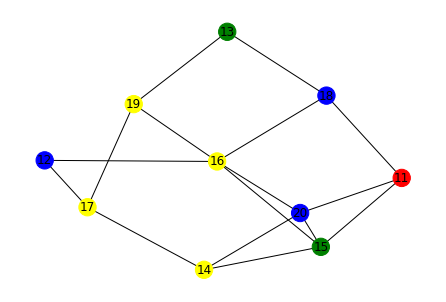

Iteration 2: 4 conflicts


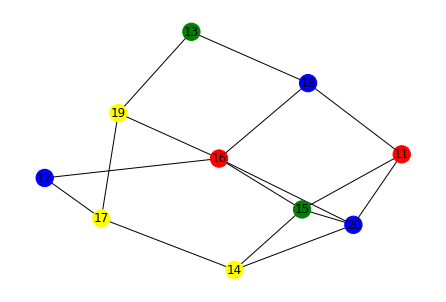

Iteration 3: 2 conflicts


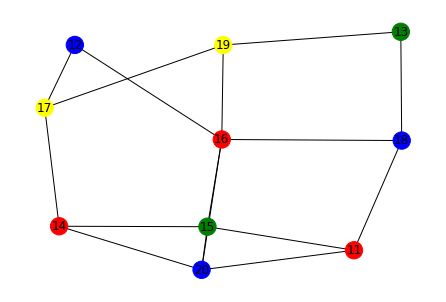

Found solution in 4 steps


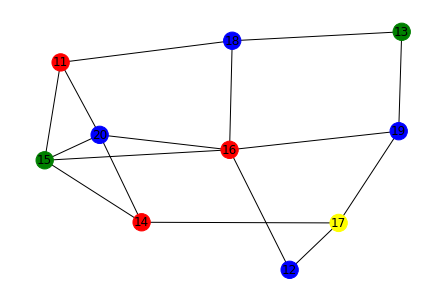

In [ ]:
# Making a random graph with 10 nodes with edge probability of 1/3
# and we try to color this graph with 4 colors
G = Graph.random(10, prob=1/3, domain=['blue', 'green', 'red', 'yellow'])

# We make an instance of MinConflictSolver and
# pass our graph as a problem to this solver
solver = MinConflictSolver(G)

# cnt keeps amount of passed iterations
# of the algorithm
cnt = 1

# We terminate solver if it iterates for more than
# 1000 times or if it finds a solution
while not solver.step() and cnt < 1000:

    # printing graph's status after current iteration
    conflicts_amo = sum([var.count_conflicts() for var in G.variables])
    print(f'Iteration {str(cnt)}: {conflicts_amo} conflicts')
    G.visualize()

    # increasing iteration counter
    cnt += 1

# If cnt = 1000, it means we have terminated
# iteration because solver has not found any solution
if cnt == 1000:
    print('No solution found')

# Otherwise solver has found a solution and
# we visualize the solution using "visualize" method
else:
    print(F'Found solution in {str(cnt)} steps')
    G.visualize()

Our Solver found a solution in 4 iterations!

There is no surprise because Min Conflict Algorithm is listed as one of the fastest algorithms for graph coloring problem in the Russell-Norvig's Book!

Also this notebook is available in this link:

https://colab.research.google.com/drive/1Qb7XPRP-oXh0imu1gyXc6jAACwBeRc0O?usp=share_link